In [30]:
import math
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
def f(x):
    return 3*x**2 - 4*x + 5 

In [32]:
f(3.0)

20.0

In [33]:
arr = np.arange(-3,3,0.25)
print(arr)

[-3.   -2.75 -2.5  -2.25 -2.   -1.75 -1.5  -1.25 -1.   -0.75 -0.5  -0.25
  0.    0.25  0.5   0.75  1.    1.25  1.5   1.75  2.    2.25  2.5   2.75]


In [34]:

y = f(arr)
print(y)

[44.     38.6875 33.75   29.1875 25.     21.1875 17.75   14.6875 12.
  9.6875  7.75    6.1875  5.      4.1875  3.75    3.6875  4.      4.6875
  5.75    7.1875  9.     11.1875 13.75   16.6875]


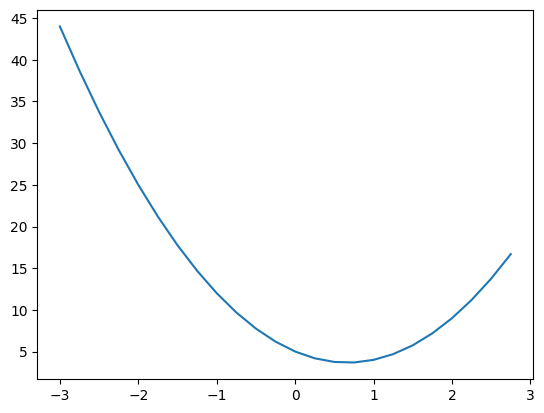

In [35]:
#as the params in the function were the vals in array 
#so we can map them to give a plot 
plt.plot(arr,y)

In [36]:
h = 0.0000000001
x = 3.0
(f(x + h) - f( x ))/h

14.000001158365194

In [37]:
def g(a,b,c):
    return a*b+c

a,b,c = 2.0,-3.0,10.0

d1 = g(a,b,c)
h = 0.0001
d2 = g(a,b+h,c)
slope = (d2-d1)/h


print('d1',d1)
print('d2',d2)
print('slope',slope)

d1 4.0
d2 4.0002
slope 2.0000000000042206


In [1]:
class Value:
    def __init__(self,data,_childern=(),_op='',_label=''): 
        #here childern is  an empty tuple
        #op is a string that will store which operations was carried out
        self.data = data
        #we will maintain it in a set so that the vals in the tuple are unique
        self._prev = set(_childern)
        #this will also be returned from arathamitic function calls
        self._op = _op
        #this will display which ever the node it was in the graph
        self._label =_label 

    def __repr__ (self):
        out =  f"Value (data={self.data})"
        return out
    
    def __add__(self,other):
        out =  Value( self.data + other.data , (self,other) , '+')
        return out
     
    def __mul__(self,other): 
        out =  Value( self.data * other.data , (self,other) , '*' )
        return out
    
# a = Value(2.0)  
# a._label = 'a'

# b = Value(-3.0)
# b._label = 'b'

# e = a*b
# e._label = 'e'

# c = Value(10.0) 
# c._label = 'c'

# d = e+c #internally this looks like :: a.__add__(b) which is returned as a class in itself
# d._label = 'd'
# d


a = Value(2.0, _label='a')
b = Value(-3.0, _label='b')
c = Value(10.0, _label='c')
e = a*b ;e._label = 'e'
d = e+c ;d._label = 'd'
f = Value(-2.0, _label='f')
L = d*f ;L._label = 'L'

In [2]:
d._prev

{Value (data=-6.0), Value (data=10.0)}

In [3]:
d._op

'+'

In [6]:
#this is a code scrapped from a repo which uses graphviz api to build graphs

from graphviz import Digraph

def trace(root):

  nodes,edges = set(),set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)

  build(root)
  return nodes, edges    

def draw_dot(root):
  
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ data %.4f}" % ( n.data ), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

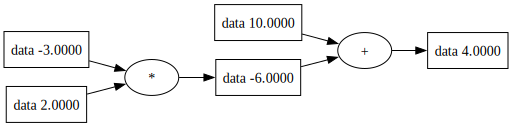

In [7]:
draw_dot(d)